In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("D:\ds\jupyter\internship\Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


LEVEL 2

Task 1 - Restaurant Ratings

Analyze the distribution of aggregate ratings and determine the most common rating range.

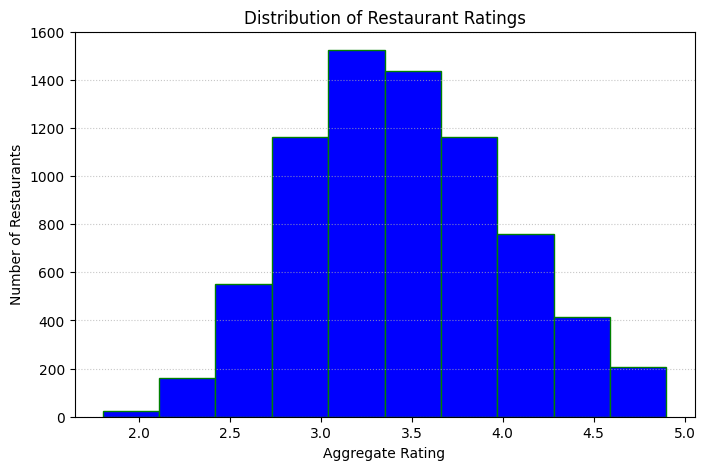

Most common rating: 3.2


In [3]:
rated = df[df["Aggregate rating"] > 0]
plt.figure(figsize=(8,5))
plt.hist(rated["Aggregate rating"], bins=10, color="blue", edgecolor="green")
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.show()
commonrating = rated["Aggregate rating"].mode()[0]
print("Most common rating:", commonrating)


Calculate the average number of votes received by restaurants.

In [4]:
average_votes = df['Votes'].astype(float).mean().round(2)
print(average_votes)

156.91


Task 2 - Cuisine Combination

Identify the most common combinations of cuisines in the dataset.

In [5]:
top_cuisines = df["Cuisines"].value_counts().head(10)
print("Most common cuisine combinations:", top_cuisines)

Most common cuisine combinations: Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


Determine if certain cuisine combinations tend to have higher ratings.

In [6]:
df_exp = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')
avg_rat = df_exp.groupby('Cuisines')['Aggregate rating'].mean().round(2)
print("Average rating of each cuisine:")
print(avg_rat.sort_values(ascending=False))

Average rating of each cuisine:
Cuisines
Sunda             4.90
B�_rek            4.70
Taiwanese         4.65
Ramen             4.50
Dim Sum           4.47
                  ... 
Moroccan          1.62
Awadhi            1.57
Armenian          1.30
Cuisine Varies    0.00
Mineira           0.00
Name: Aggregate rating, Length: 145, dtype: float64


Task 3 -Geographic Analysis

Plot the locations of restaurants on a map using longitude and latitude coordinates.

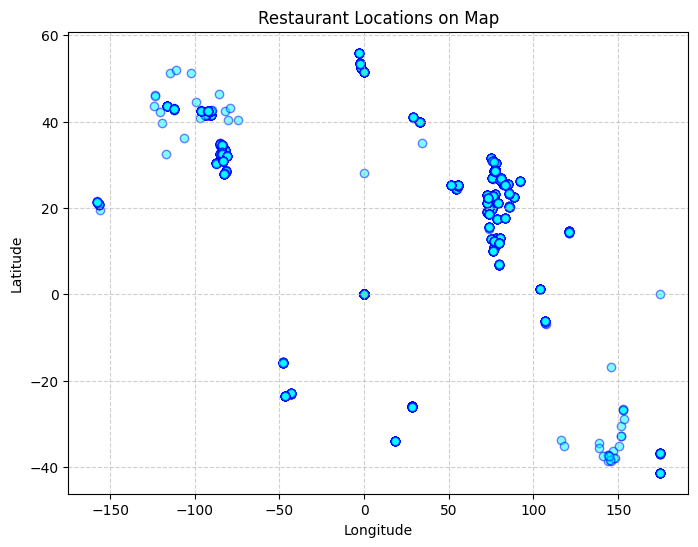

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df["Longitude"], df["Latitude"], c="cyan", alpha=0.5, edgecolor="blue")
plt.title("Restaurant Locations on Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Identify any patterns or clusters of restaurants in specific areas.

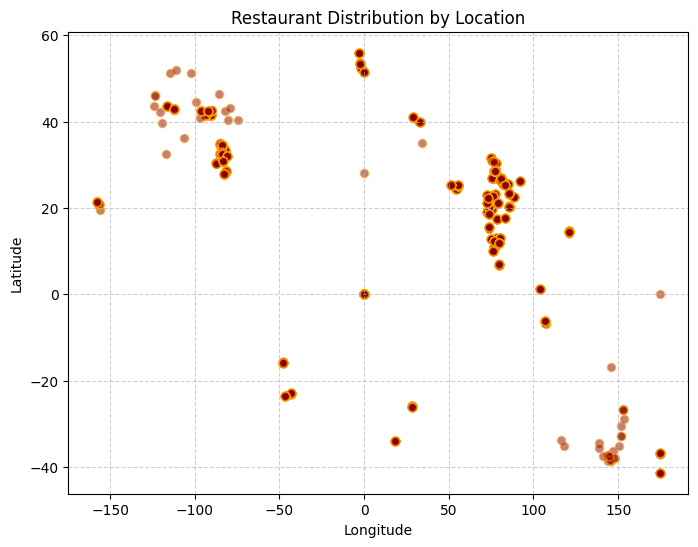

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df["Longitude"], df["Latitude"], c="darkred", alpha=0.5, edgecolor="orange")
plt.title("Restaurant Distribution by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Task 4 -Restaurant Chains

Identify if there are any restaurant chains present in the dataset.

In [9]:
chain = df["Restaurant Name"].value_counts()
restaurant = chain[chain > 1]

print("Restaurant chains found in the dataset:\n")
print(restaurant.head(10))
print("\nTotal number of restaurant chains:", len(restaurant))

Restaurant chains found in the dataset:

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

Total number of restaurant chains: 734


Analyze the ratings and popularity of different restaurant chains.

In [10]:
An = df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).round(2)
highest_rate = An.sort_values(by='Aggregate rating', ascending=False).head(10)
most_popular = An.sort_values(by='Votes', ascending=False).head(10)
print(highest_rate)
print(most_popular)


                                          Aggregate rating  Votes
Restaurant Name                                                  
Solita                                                 4.9    162
Spiral - Sofitel Philippine Plaza Manila               4.9    621
Flat Iron                                              4.9    309
Sagar Gaire Fast Food                                  4.9    427
Bao                                                    4.9    161
Yellow Dog Eats                                        4.9   1252
Gaga Manjero                                           4.9     95
Sushi Masa                                             4.9    605
Shorts Burger and Shine                                4.9    820
Sheroes Hangout                                        4.9     77
                           Aggregate rating  Votes
Restaurant Name                                   
Barbeque Nation                        4.35  28142
AB's - Absolute Barbecues              4.82  13400
Toit